<a href="https://colab.research.google.com/github/Sambhaji6529/RFM-Analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
df=pd.read_csv("/content/drive/MyDrive/OnlineRetail 1.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [31]:
df.shape

(541909, 8)

In [34]:
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [33]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
# df.describe(include=['O'])
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [35]:
# Alternate
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(df).sort_values(by='Nulls', ascending=False))


<ipython-input-35-c6f333f940b3>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Min = df.min()
<ipython-input-35-c6f333f940b3>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Max = df.max()


Data shape: (541909, 8)
___________________________
Data Types:
object     5
float64    2
int64      1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
CustomerID,float64,406829,4373,135080,12346.0,18287.0
Description,object,540455,4224,1454,NaN,NaN
Country,object,541909,38,0,Australia,Unspecified
InvoiceDate,object,541909,23260,0,1/11/2011 10:01,9/9/2011 9:52
InvoiceNo,object,541909,25900,0,536365,C581569
Quantity,int64,541909,722,0,-80995,80995
StockCode,object,541909,4070,0,10002,m
UnitPrice,float64,541909,1630,0,-11062.06,38970.0


Evaluations:

The CustomerID and Description fields have null values.

Quantity and UnitPrice should have a value >= 0, but from the summary above there are negative values for the two columns.

i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out

In [36]:
# counts of the negative values in the Quantity
df[df['Quantity'] <0].shape[0]

10624

In [37]:
# counts of the negative values in the UnitPrice
df[df['UnitPrice'] < 0].shape[0]

2

In [38]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12/8/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12/8/2011 14:52,-11062.06,NaN,United Kingdom


In [39]:
df[df['Quantity'] <0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,1/12/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,1/12/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,1/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,1/12/2010 10:24,0.29,17548.0,United Kingdom


Explanation:

It is exceptional to have Negative Quantity and Unit Price. We cannot use these rows for the analysis. Therefore we will drop them

Clean the Data from the Noise and Missing Values


In [41]:
details = summary(df)
display(details.sort_values(by='Uniques', ascending=False))

<ipython-input-35-c6f333f940b3>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Min = df.min()
<ipython-input-35-c6f333f940b3>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Max = df.max()


Data shape: (541909, 8)
___________________________
Data Types:
object     5
float64    2
int64      1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
InvoiceNo,object,541909,25900,0,536365,C581569
InvoiceDate,object,541909,23260,0,1/11/2011 10:01,9/9/2011 9:52
CustomerID,float64,406829,4373,135080,12346.0,18287.0
Description,object,540455,4224,1454,NaN,NaN
StockCode,object,541909,4070,0,10002,m
UnitPrice,float64,541909,1630,0,-11062.06,38970.0
Quantity,int64,541909,722,0,-80995,80995
Country,object,541909,38,0,Australia,Unspecified


**Explore the Orders**

1.Find the unique number of InvoiceNo per customer

In [42]:
# Her musterinin siparis sayisi
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
13089.0    118
          ... 
13877.0      1
16400.0      1
13878.0      1
13886.0      1
13670.0      1
Name: InvoiceNo, Length: 4372, dtype: int64

1.What's the average number of unqiue items per order or per customer?

In [43]:
# Her bir musterinin her siparisteki unique products sayisinin ortalamasi
mean_of_unique_items= round(df.groupby(['CustomerID',
                      'InvoiceNo']).agg({'StockCode':lambda x:x.nunique()}).groupby('CustomerID')['StockCode'].mean(),
                      1).sort_values(ascending=False)
mean_of_unique_items

CustomerID
12378.0    219.0
12688.0    171.0
15464.0    155.0
15004.0    154.0
14096.0    149.9
           ...  
14616.0      1.0
15590.0      1.0
17024.0      1.0
14609.0      1.0
12346.0      1.0
Name: StockCode, Length: 4372, dtype: float64

1.Let's see how this compares to the number of unique products per customer.

In [45]:
# Her musterinin satin aldigi unique product sayisi
num_of_unique_product= pd.DataFrame(df.groupby('CustomerID').StockCode.nunique()).rename(columns={'StockCode':'num_of_unique_product'})

# Her musterinin siparis sayisi
num_of_order = df.groupby('CustomerID').InvoiceNo.nunique()

pd.concat([mean_of_unique_items,
           num_of_order,
           num_of_unique_product],
           axis=1).rename(columns={'StockCode': "mean_of_unique_items",
                                   'InvoiceNo': 'num_of_order'}).sort_values('num_of_order', ascending=False)

,mean_of_unique_items,num_of_order,num_of_unique_product
CustomerID,,,
14911.0,23.8,248,1794
12748.0,19.3,224,1769
17841.0,45.0,169,1331
14606.0,21.4,128,832
13089.0,15.7,118,636
...,...,...,...
13877.0,3.0,1,3
16400.0,28.0,1,28
13878.0,35.0,1,35


# **RFM Analysis**

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.

Our goal in this Notebook is to cluster the customers in our data set to:

Recognize who are our most valuable customers
Increase revenue
Increase customer retention
Learn more about the trends and behaviors of our customers
Define customers that are 5-Lost Customers
We will tart with RFM Analysis and then compliment our findings with predictive analysis using K-Means Clustering Algorithms.

RECENCY (R): Time since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total monetary value
Benefits of RFM Analysis

Increased customer retention
Increased response rate
Increased conversion rate
Increased revenue
RFM Analysis answers the following questions:

Who are our best customers?
Who has the potential to be converted into more profitable customers?
Which customers do we need to retain?
Which group of customers is most likely to respond to our marketing campaign?

i. Import Libraries

In [46]:
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

ii. Review df_uk DataFrame

In [47]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df_uk=df[df.Country=='United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


**iii. Recency: Days since last purchase**

To calculate the recency values, follow these steps in order:

1.To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

2.Create a new column called Date which contains the invoice date without the timestamp.

3.Group by CustomerID and check the last date of purchase
Calculate the days since last purchase.

4.Drop Last_Purchase_Date since we don't need it anymore.

5.Plot RFM distributions.

1.Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [48]:
# a point of reference date 

ref_date = max(df['InvoiceDate'])
ref_date

Timestamp('2011-12-10 17:19:00')

1.Create a new column called Date which contains the invoice date without the timestamp

In [49]:
df_uk['Date']=df_uk['InvoiceDate'].apply(lambda x: x.date())
df_uk.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12


2.Group by CustomerID and check the last date of purchase

In [51]:
df_uk['Last_Purchase_Date']=df_uk.groupby(['CustomerID'])['Date'].transform(max)
# df_uk.groupby('CustomerID').agg({'Date': lambda x:x.max()})
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Last_Purchase_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,2011-10-02
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,2011-10-02
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,2011-10-02
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,2011-10-02
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,2011-10-02


3.Calculate the days since last purchase

In [52]:
df_uk['Recency']=df_uk.groupby('CustomerID')['Last_Purchase_Date'].apply(lambda x:ref_date.date() - x)
df_uk['Recency']=df_uk.agg({'Recency':lambda x:x.astype('timedelta64[D]')})

# df_uk.groupby('CustomerID').agg({'Date': lambda x: (today.date() - x.max()).days})
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Last_Purchase_Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,2011-10-02,69.0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,2011-10-02,69.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,2011-10-02,69.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,2011-10-02,69.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,2011-10-02,69.0


In [53]:
df_uk.Recency.value_counts().sort_index()

0.0      18180
1.0      14775
2.0       4835
3.0       7413
4.0       5015
         ...  
546.0       72
577.0      181
638.0       71
666.0      184
697.0      422
Name: Recency, Length: 302, dtype: int64

4.Plot RFM distributions

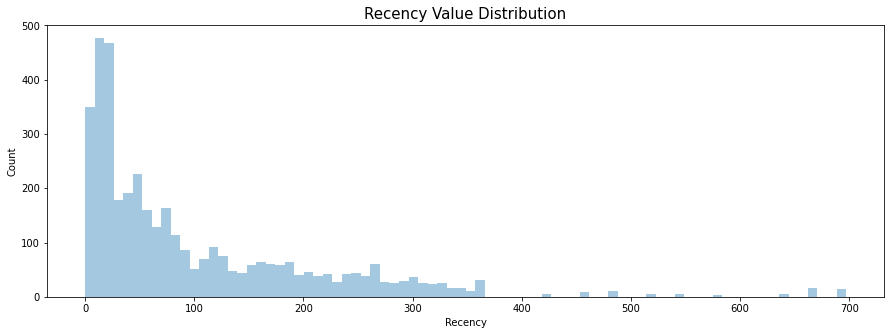

In [56]:
plt.subplots(figsize=(15, 5))
sns.distplot(df_uk.groupby('CustomerID')['Recency'].max(), kde=False, bins=80)
plt.title('Recency Value Distribution', fontsize = 15)
plt.xlabel('Recency')
plt.ylabel('Count');

iv. Frequency: Number of purchases
To calculate how many times a customer purchased something, we need to count how many invoices each customer has. To calculate the frequency values, follow these steps in order:

1.Plot RFM distributions

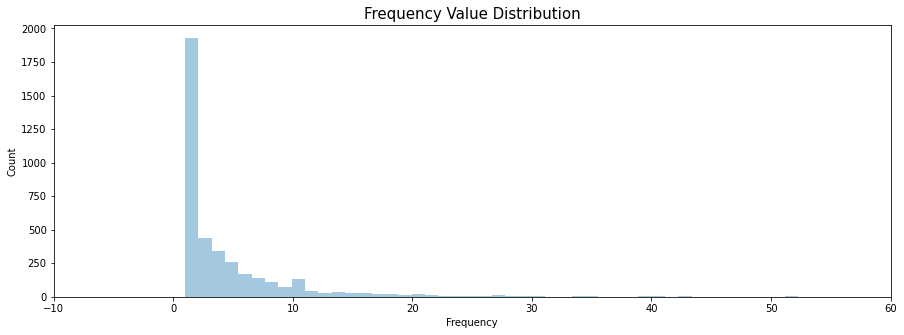

In [58]:
plt.figure(figsize=(15, 5))
sns.distplot(df_uk.groupby('CustomerID')['Frequency'].max(), kde=False, bins=200)
plt.title('Frequency Value Distribution', fontsize = 15)
plt.xlim(-10, 60)
plt.xlabel('Frequency')
plt.ylabel('Count');

In [69]:
# For recency will check what was the last date of transaction
#First will convert the InvoiceDate as date variable
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')